# Imports préalables pour visualisation pratique

In [2]:
import pandas as pd
pd.set_option("display.max_columns", None )

import numpy as np

# Bonnes pratiques

#### Mettre sa source dans une variable, accroît la visibilité et évite les longues lignes de code

In [40]:
source = "titanic.csv"
data = pd.read_csv(source)

#### .format et F-string

.format permet d'utiliser aussi les clefs valeurs d'un dictionnaire

In [41]:
prenom = "Xavier"
print("Bonjour {}, comment vas tu?".format(prenom))

Bonjour Xavier, comment vas tu?


In [42]:
prenom_frere = "Gerald"
age_xavier = 42
print("Mon frère s'appelle {} et j'aurai bientôt {} ans.".format(prenom_frere,age_xavier+1))

Mon frère s'appelle Gerald et j'aurai bientôt 43 ans.


In [43]:
dictionnaire = {"prenom" : "Xavier", "age" : 42}
print("Je m'appelle {prenom} et j'ai {age} ans".format(**dictionnaire))

Je m'appelle Xavier et j'ai 42 ans


f.string plus lisible et performant (rapidité de calcul) mais non utilisable avec un dictionnaire

In [44]:
print(f"Bonjour {prenom}, comment vas tu?")
print(f"Mon frère s'appelle {prenom_frere} et j'aurai bientôt {age_xavier+1} ans.")

Bonjour Xavier, comment vas tu?
Mon frère s'appelle Gerald et j'aurai bientôt 43 ans.


#### Mettre ses multiples modifications dans une variable, accroît la visibilité, évite les longues lignes de code et des retouches aisées
ici avec une liste mais fonctionne aussi avec un dictionnaire

In [55]:
df_exemple_1 = pd.read_csv(source)
df_exemple_1.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [47]:
colonnes_a_supprimer = ["Ticket",
                        "Fare",
                        "Cabin"]

df_exemple_1 = df_exemple_1.drop(columns= colonnes_a_supprimer)

In [48]:
df_exemple_1.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,S


# Tips

#### Trop de colonnes pour visualiser certaines infos, inverser lignes colonnes
très efficace sur les grands dataset combiné avec pd.set_option

In [49]:
details_dtypes = data.dtypes
df_details_dtypes = pd.DataFrame(details_dtypes)
df_details_dtypes.T

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,int64,int64,int64,object,object,float64,int64,int64,object,float64,object,object


#### Besoin de couleur dans un commentaire?

In [50]:
# <span style="color: red; font-weight: bold;">pour une analyse approfondie non biaisée il conviendra de filtrer out "waves" 6 à 9.</span>

<span style="color: red; font-weight: bold;">pour une analyse approfondie non biaisée il conviendra de filtrer out "waves" 6 à 9.</span>

#### Fusionner plusieurs csv ayant les mêmes headers 
Pour cet exemple les csv doivent être dans le fichier où est le notebook sinon il faudra définir le chemin.

In [ ]:
import glob

# définition du format des sources présentes à fusionner
chemin_fichiers = "*scv"
# création d'une liste des fichiers
fichiers = glob.glob(chemin_fichiers)
# itération read_csv en compréhension de liste, sep /header / index_col spécifique à l'exemple extrait.
df_fichiers = [pd.read_csv(fichier,
                 sep = ";",
                 header = 1,
                 index_col = False) 
                 for fichier in fichiers]

# fusion via concat de toutes les lignes en conservant  lignes de headers
df_glob = pd.concat(df_fichiers, ignore_index = True)

# va crash à l'exécution si absence de plusieurs fichiers

#### Mettre en forme les labels de Matplotlib
Création d'un datafrme à mettre en viz

In [ ]:
nb_passagers = data["PassengerId"].nunique()
print(f"Le nombre de sujets total est de {nb_passagers}.")

Le nombre de sujets total est de 891.


In [ ]:
# mask pour filtrer les hommes
mask_hommes = (data["Sex"] == "male")

# calcul du nombre d'hommes et déduction du nombre de femmes
nb_hommes = len(data[mask_hommes])
nb_femmes = nb_passagers - nb_hommes

# mise en dicitionnaire pour graphique
df_pourcentage_population = {"Genre": ["Hommes", "Femmes"],
                             "Nombre": [nb_hommes,nb_femmes]}

Création d'un pie chart

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import catppuccin
mpl.style.use(catppuccin.PALETTE.frappe.identifier)

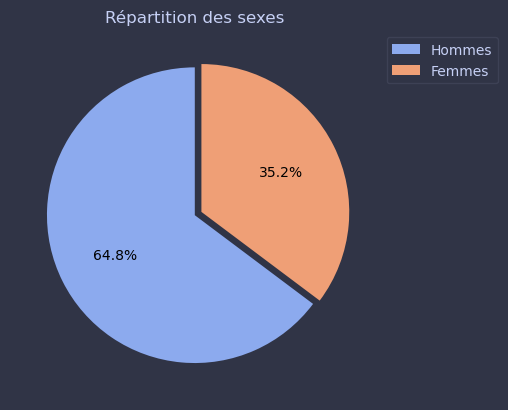

In [ ]:
# Création du pie chart avec récupération des objets de texte
wedges, texts, autotexts = plt.pie(
    x=df_pourcentage_population["Nombre"],
    autopct="%1.1f%%",
    startangle=90,
    explode=[0, 0.05]
)

# Mettre la couleur des labels internes (autopct) en noir
for autotext in autotexts:
    autotext.set_color('black')

plt.title("Répartition des sexes")
plt.legend(df_pourcentage_population["Genre"], bbox_to_anchor=(1, 1))
plt.show()